# Monte Carlo Simulation - Portfolio and Stock Market Prediction

Monte Carlo simulation is a computerized mathematical technique that allows people to account for risk in quantitative analysis and decision making. The technique is used by professionals in such widely disparate fields as finance, project management, energy, manufacturing, engineering, research and development, insurance, oil & gas, transportation, and the environment.  A Monte Carlo simulation is a method that allows for the generation of future potential outcomes of a given event. In this case, we are trying to model the price pattern of a given stock or portfolio of assets a predefined amount of days into the future. 




The  level of statistical noise within the  stock markets makes Monte Carlo Simulation as its perfect application and we are trying to model the probability of different outcomes. Thousands of outcomes on the potential price pattern of a stock can be generated using Python.  Here, this notebook  focuses on generating an optimum investment portfolio via Monte-Carlo simulation by implementing an end-to-end application in Python.

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import scipy.stats as ss


/home/abera/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


##### Downloading the data via API

In [2]:
tickers = ['AAPL','GOOG','MSFT','AMZN']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2004-8-19')['Adj Close']

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3989 entries, 2004-08-19 to 2020-06-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3989 non-null   float64
 1   GOOG    3989 non-null   float64
 2   MSFT    3989 non-null   float64
 3   AMZN    3989 non-null   float64
dtypes: float64(4)
memory usage: 155.8 KB


In [4]:
data.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2004-08-19,1.898969,49.982655,17.505459,38.630001
2004-08-20,1.904534,53.952770,17.557100,39.509998
2004-08-23,1.921849,54.495735,17.634779,39.450001
2004-08-24,1.975645,52.239193,17.634779,39.049999
2004-08-25,2.043664,52.802086,17.835468,40.299999


In [5]:
data.tail()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-17,351.589996,1451.119995,194.240005,2640.979980
2020-06-18,351.730011,1435.959961,196.320007,2653.979980
2020-06-19,349.720001,1431.719971,195.149994,2675.010010
2020-06-22,358.869995,1451.859985,200.570007,2713.820068
2020-06-23,366.529999,1464.410034,201.910004,2764.409912


Normalization to 100:




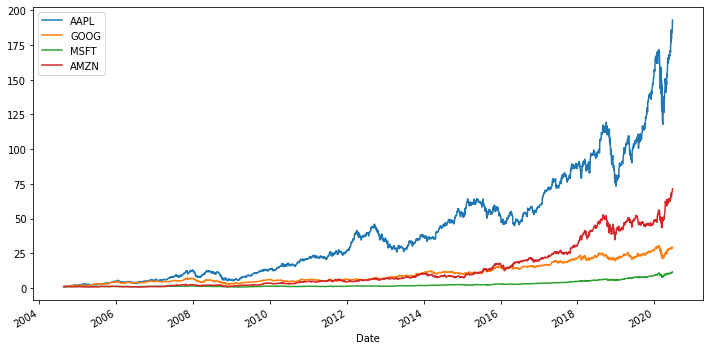

In [6]:
# visualizing the normalized data
data = data/data.iloc[0]

data.plot(figsize=(12,6));


Apple and Amazon's stock prices grow  faster than the others two prices. Therfore, let's create a portfolio that provides a solid return on investment.

#### Simple Return of a Portfolio of Securities


Here, the first step is to calculate the returns of the assets in your portfolio. Then we can calculate the annual return. 
To calculate the asset returns, let us perform the following two steps: fetch the historical daily prices of the assets  and then compute their geometric returns using the equation:

$$R_t=\frac{P_t}{P_{t-t}},$$

where $P_t$ is the current price. The returns are generated so that we can standardised the stock prices so that they can be compared.

In [7]:
port_return = data/data.shift(1)-1
port_return.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2004-08-19,NaN,NaN,NaN,NaN
2004-08-20,0.002930,0.079430,0.002950,0.022780
2004-08-23,0.009091,0.010064,0.004424,-0.001519
2004-08-24,0.027992,-0.041408,0.000000,-0.010139
2004-08-25,0.034429,0.010775,0.011380,0.032010


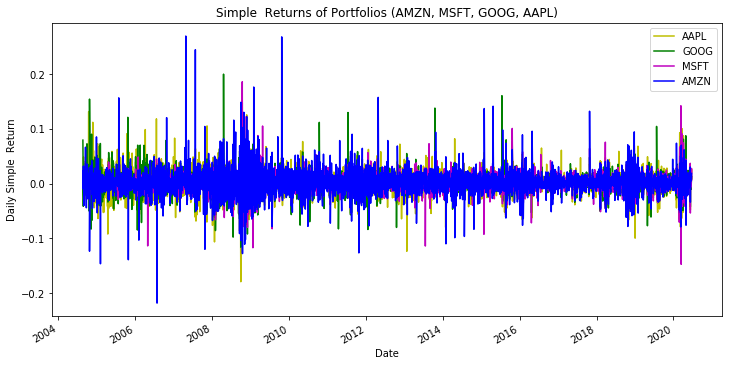

In [8]:
port_return.plot(figsize=(12,6), color = ['y','g','m','b'])
plt.ylabel('Daily Simple  Return')
plt.xlabel('Date')
plt.title('Simple  Returns of Portfolios (AMZN, MSFT, GOOG, AAPL)');

#### Log Asset Returns

The log return  is the logarithm (with the natural base) of a gross return
and $\log P_t$ is called the log price. It is given by
$$
r_t = ln(\frac{P_t}{P_{t-1}})
$$

In [9]:
data_log_returns = np.log(data/data.shift(1))
data_log_returns

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2004-08-19,NaN,NaN,NaN,NaN
2004-08-20,0.002926,0.076433,0.002946,0.022525
2004-08-23,0.009050,0.010013,0.004415,-0.001520
2004-08-24,0.027608,-0.042289,0.000000,-0.010191
2004-08-25,0.033849,0.010718,0.011316,0.031509
...,...,...,...,...
2020-06-17,-0.001393,0.005805,0.003455,0.009783
2020-06-18,0.000398,-0.010502,0.010651,0.004910
2020-06-19,-0.005731,-0.002957,-0.005978,0.007893


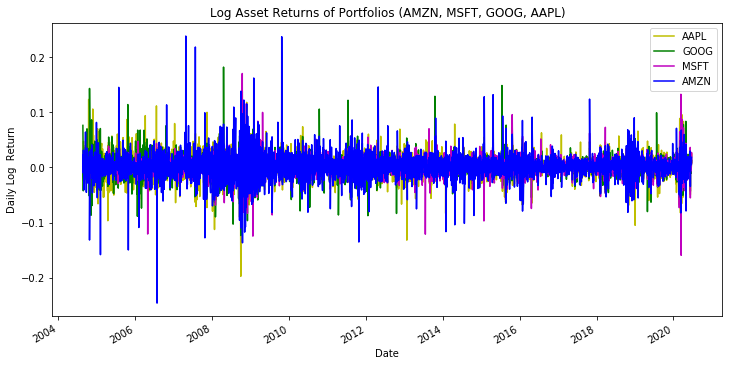

In [10]:
data_log_returns.plot(figsize=(12,6),color = ['y','g','m','b'])
plt.ylabel('Daily Log  Return')
plt.xlabel('Date')
plt.title('Log Asset Returns of Portfolios (AMZN, MSFT, GOOG, AAPL)');

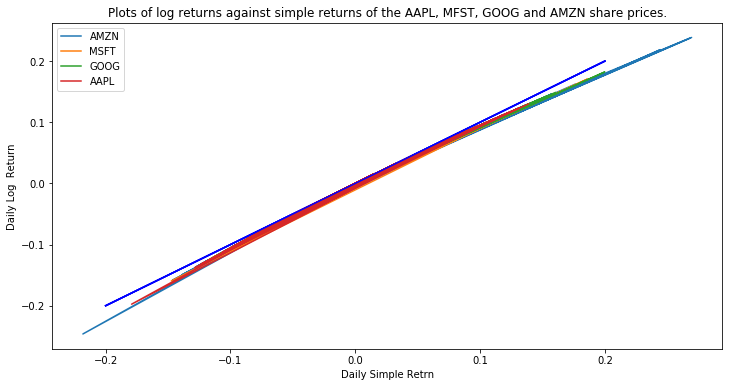

In [11]:
assets=['AMZN', 'MSFT', 'GOOG', 'AAPL']
plt.figure(figsize=(12,6))
for asset in assets:    
    plt.plot(port_return[asset],data_log_returns[asset],label= asset)
    plt.plot(np.linspace(-0.2,0.2),np.linspace(-0.2,0.2), color='b')#,label='Log Return = Simple Return')
    plt.ylabel('Daily Log  Return')
    plt.xlabel('Daily Simple Retrn')
    plt.title('Plots of log returns against simple returns of the AAPL, MFST, GOOG and AMZN share prices.')
    # The blue straight lines mark the positions where the two returns are identical.
    plt.legend();

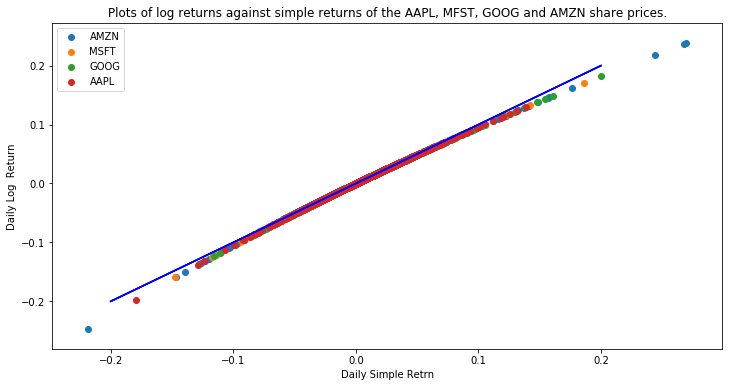

In [12]:
assets=['AMZN', 'MSFT', 'GOOG', 'AAPL']
plt.figure(figsize=(12,6))
for asset in assets:    
    plt.scatter(port_return[asset],data_log_returns[asset],label= asset)
    plt.plot(np.linspace(-0.2,0.2),np.linspace(-0.2,0.2), color='b')#,label='Log Return = Simple Return')
    plt.ylabel('Daily Log  Return')
    plt.xlabel('Daily Simple Retrn')
    plt.title('Plots of log returns against simple returns of the AAPL, MFST, GOOG and AMZN share prices.')
    # The blue straight lines mark the positions where the two returns are identical.
    plt.legend();

The blue straight lines mark the positions where the two returns are identical.

Asset Expected Mean Returns

To compute the asset expected mean return, we need the mean of the returns of each stock.




In [13]:
data_log_returns_a = data_log_returns.mean() * 250 #We multiply by 250 here considering annually.
data_log_returns_a

AAPL    0.329913
GOOG    0.211731
MSFT    0.153292
AMZN    0.267713
dtype: float64

In [14]:
print (str(round(data_log_returns_a, 5) * 100))

AAPL    32.991
GOOG    21.173
MSFT    15.329
AMZN    26.771
dtype: float64


The percentage of log return implies Apple Inc and Amazon are having high value, respectively.

Returns of Portfolio Securities
--- 
Portfolio return refers to the gain or loss realized by an investment portfolio containing several types of investments.  A best practice followed by many investors is to review their portfolios at the end of every year and make adjustments to continue meeting their investment objectives. 

In [15]:
weights = np.array([0.25, 0.25, 0.25,0.25])#Assumed equal weights

In [16]:
np.dot(port_return, weights)

array([        nan,  0.0270226 ,  0.00551519, ..., -0.00167578,
        0.02062818,  0.01382785])

In [17]:
annual_port_return = port_return.mean() * 250
annual_port_return

AAPL    0.385496
GOOG    0.257884
MSFT    0.189521
AMZN    0.340971
dtype: float64

In [18]:
np.dot(annual_port_return, weights)

0.2934678396786369

In [19]:
pfolio_1 = str(round(np.dot(annual_port_return, weights),6) * 100) + ' %'
print (pfolio_1)

29.3468 %


In [20]:
weights_2 = np.array([0.3, 0.3, 0.2, 0.2])

In [73]:
pfolio_2 = str(round(np.dot(annual_port_return, weights_2), 7) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

29.3468 %
29.91122 %


### Calculating the risk of securities

#### Portfolio Risk

The risk of an asset can be computed using a number of risk measures. One of these measures is the standard deviation which can inform us of how the price of an asset deviates from its mean. The volatility of the portfolio is the risk of the portfolio and is computed by calculating the standard deviation of the returns of each stock along with the covariance between each pair of the stocks as:

$$Volatility =\sqrt{W\cdot CM\cdot W^T},$$ where $W$ is the weight vector and $CM$ is the covariuance matrix.

Volatility  is the standard deviation i.e. the total risk of the portfolio. Thus, standard deviation measures the dispersion (volatility) of the values around the mean.





In [22]:
port_return.mean()*250 #Expected Portfolio Return

AAPL    0.385496
GOOG    0.257884
MSFT    0.189521
AMZN    0.340971
dtype: float64

<Figure size 864x432 with 0 Axes>

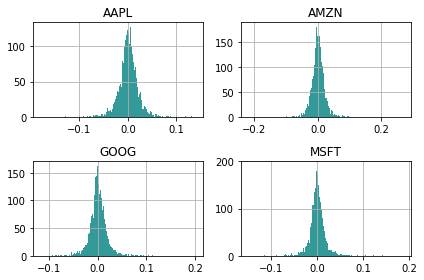

In [23]:
plt.figure(figsize=(12,6))
ax = port_return.hist(bins=300, color = 'teal', alpha=0.8);
plt.tight_layout()
#ax.set(xlabel='PAYMENTDAY', ylabel='Count')
plt.show();


The risk of a security can be first ovserved by the standard deviation of the securities. Store the volatilities of the  stocks in an array called "vols".

In [24]:
vols = port_return.std()*250**0.5 #Anuall portfolio risk
vols

AAPL    0.332828
GOOG    0.304956
MSFT    0.269351
AMZN    0.384838
dtype: float64

From these values Amazon is more volatile than the others and Microsoft is better than others.

Covariance and correlation
---
\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

###### Covariance 

In [25]:
cov_matrix = port_return.cov()*250 # Calculating the covariance matrix of securities annually
cov_matrix

,AAPL,GOOG,MSFT,AMZN
AAPL,0.110774,0.050650,0.043618,0.053986
GOOG,0.050650,0.092998,0.043037,0.056436
MSFT,0.043618,0.043037,0.072550,0.050255
AMZN,0.053986,0.056436,0.050255,0.148100


###### Correlation

In [26]:
port_return.corr() # Calculating the correlation between the securities

,AAPL,GOOG,MSFT,AMZN
AAPL,1.000000,0.499029,0.486551,0.421489
GOOG,0.499029,1.000000,0.523947,0.480885
MSFT,0.486551,0.523947,1.000000,0.484823
AMZN,0.421489,0.480885,0.484823,1.000000


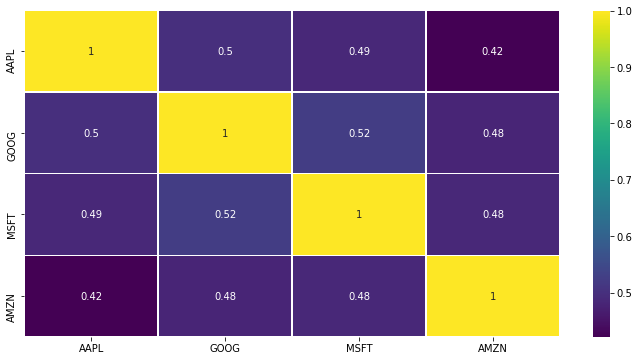

In [27]:
plt.figure(figsize = (12,6))
sns.heatmap(port_return.corr(), 
            annot=True, 
            linewidth=0.5,
           cmap = 'viridis'); 

#### Computing the Portfolio Risk

Let us consider equal weigthing scheme:

In [28]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

Variance of the portfolio

In [29]:
pfolio_var = np.dot(weights.T, np.dot(port_return.cov() * 250, weights))
pfolio_var

0.06377436066248393

Volatility of the portfolio: (standard deviation of the portfolio)

In [30]:
pfolio_vol = (np.dot(weights.T, np.dot(port_return.cov() * 250, weights))) ** 0.5
pfolio_vol

0.2525358601515514

In [31]:
print (str(round(pfolio_vol, 4) * 100) + ' %')

25.25 %


Efficient Frontiers
---

The efficient frontier is a financial tool that helps an investor compose an investment portfolio with the best returns given the amount of risk. It was introduced by Harry Markowitz in 1952.  Portfolios that lie below or to the right of the efficient frontier are considered sub-optimal. That’s because the rate of return isn’t high enough to justify the risk. Profiles that lie above the frontier are optimal, and returns balance out the risk. Thus, it is the set of portfolios that gets us the highest expected return for any given risk level. Or from another perspective, the minimum amount of risk for an expected return. 

In summary, for $m$ securities with return $R_i$ and let say $w_i$ is the initial portion of wealth invested in security $i$. Consider $$r_i=E[R_i],\\ \,\,\sigma_{ij}=cov(R_i,R_j).$$
 The investor objective is to find $(w_1,w_2,...,w_m)$ so as to minimize the risk (variance):
$$\sum_{i,j}\sigma_{ij}w_iw_j$$
subject to
1. $\sum_{i}r_{i}w_i = R$, target portfolio mean return.
2. $\sum_{i}w_i=1$, budget constraint.
3. $w_i\ge0,\,\,i=1,2,3,...,m$, optional short sales constraints.

In [32]:
num_tickers = len(tickers)
num_tickers

4

In [33]:
weights = np.random.random(num_tickers)
weights /= np.sum(weights)
weights

array([0.22180457, 0.44989799, 0.07967557, 0.24862187])

In [34]:
sum(weights)

1.0

Expected Return of the Portfolio

In [35]:
np.sum(weights * port_return.mean()) * 250

0.30139914741528046

Expected variance of the Portfolio

In [36]:
np.dot(weights.T, np.dot(port_return.cov() * 250, weights))

0.06919482949371134

Expected Volatility of the portfolio

In [37]:
np.sqrt(np.dot(weights.T,np.dot(port_return.cov() * 250, weights)))

0.263049100917892

Let us create a loop with 10,000 iterations. It will then generate random weights, summing to 1. We  will then append the obtained values for the portfolio returns and the portfolio volatilities to pfolio_returns and pfolio_volatilities, respectively.

In [38]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (10000):
    weights = np.random.random(num_tickers)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * data_log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(data_log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.23174430882206143,
  0.22128952733418797,
  0.29102622503422093,
  0.2204904763755207,
  0.21538249792619807,
  0.2645001986729167,
  0.24446583604330166,
  0.2622616424932686,
  0.24053728327115667,
  0.2474767458550453,
  0.270143763113322,
  0.24979013627262497,
  0.21313864479137254,
  0.2310156902228792,
  0.22785499748382274,
  0.2339028174679406,
  0.23701026486543028,
  0.2476237289891068,
  0.24666069638451493,
  0.21808689573324372,
  0.2272754374237408,
  0.25434660982347596,
  0.26378479303191943,
  0.25854745420598524,
  0.25022123602136087,
  0.26256612783169286,
  0.23199968846029723,
  0.250153252234287,
  0.26370292276589424,
  0.27982828533628595,
  0.2507968095040002,
  0.23881589158265357,
  0.22317147460429032,
  0.2761036633962235,
  0.25264791743989673,
  0.21780885079336237,
  0.24590244885740198,
  0.22774587046605102,
  0.2725428160546705,
  0.2750893044987887,
  0.26281452268763744,
  0.23459345314481708,
  0.2325501633077623,
  0.20994307448932964,
  0.2

Transform the above lists into NumPy arrays and reassign them to pfolio_returns and pfolio_volatilites. 

In [39]:
#Once we have done that, the two objects will be NumPy arrays.
pfolio_returns = [] 
pfolio_volatilities = []

for x in range (10000):
    weights = np.random.random(num_tickers)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * data_log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(data_log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
sharpe_rat = np.array(pfolio_returns/pfolio_volatilities)
pfolio_returns, pfolio_volatilities,sharpe_rat

(array([0.21907448, 0.22176747, 0.22961087, ..., 0.24851015, 0.2444636 ,
        0.24878501]),
 array([0.24290591, 0.27235047, 0.24749016, ..., 0.25940217, 0.2517392 ,
        0.25421987]),
 array([0.9018903 , 0.8142724 , 0.92775756, ..., 0.95801107, 0.97109865,
        0.97862143]))

In [40]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities,'Sharpe':sharpe_rat})



In [41]:
portfolios.head()

,Return,Volatility,Sharpe
0,0.219074,0.242906,0.901890
1,0.221767,0.272350,0.814272
2,0.229611,0.247490,0.927758
3,0.266773,0.293242,0.909738
4,0.243909,0.270611,0.901328


In [42]:
max_sr_ret=pfolio_returns[sharpe_rat.argmax()]
max_sr_vol=pfolio_volatilities[sharpe_rat.argmax()]

In [43]:
print('Maximum Sharpe ratio in the array: {}'.format(sharpe_rat.max()))
print('Its Location in the array: {}'.format(sharpe_rat.argmax()))

Maximum Sharpe ratio in the array: 1.0452504989255091
Its Location in the array: 4539


In [44]:
pfolio_returns.mean()

0.240790761884555

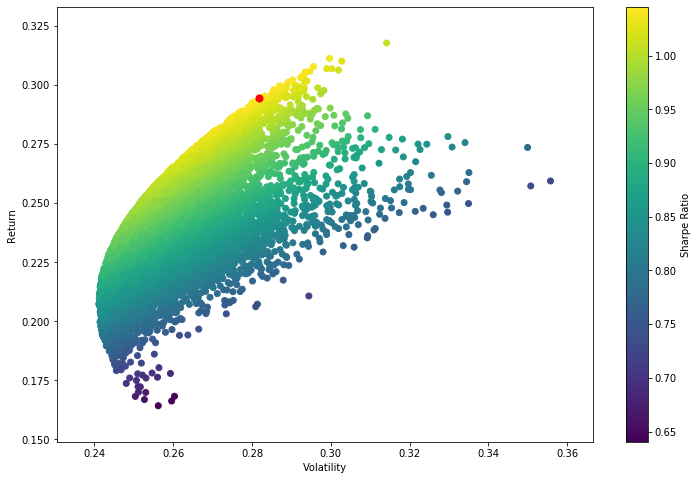

In [45]:
plt.figure(figsize=(12,8))
plt.scatter( portfolios['Volatility'],portfolios['Return'],c=sharpe_rat, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

In [46]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(data_log_returns.mean() * weights) * 250
    vol = np.sqrt(np.dot(weights.T, np.dot(data_log_returns.cov()*250, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [47]:
from scipy.optimize import minimize
cons = ({'type':'eq','fun':check_sum})
bounds = ((0,1),(0,1),(0,1),(0,1))
init_guess = [0.25,0.25,0.25,0.25]

opt_results = minimize(neg_sharpe,
                       init_guess,
                       method='SLSQP',
                       bounds = bounds,
                       constraints = cons)
print(opt_results)

     fun: -1.046588630830736
     jac: array([ 3.33189964e-05,  9.83774662e-05,  3.69709581e-02, -1.74283981e-04])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.64757394, 0.14610543, 0.        , 0.20632063])


In [48]:
get_ret_vol_sr(opt_results.x)

array([0.29981263, 0.28646655, 1.04658863])

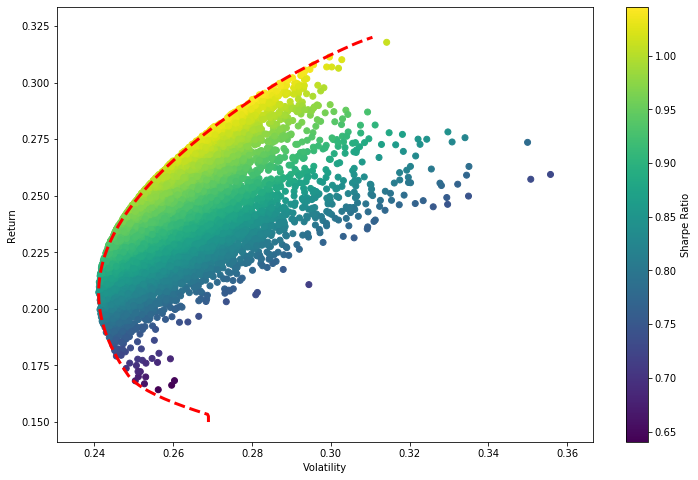

In [49]:
frontier_y=np.linspace(0.15,0.32,200)


def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,
                      init_guess,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=cons)
    frontier_x.append(result['fun'])


plt.figure(figsize=(12,8))
plt.scatter(pfolio_volatilities, pfolio_returns, c=sharpe_rat, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('frontier.png')
plt.show()

### Calculate the expected return (CAPM)
### $$
E[R] = r_f + \beta(\overline{r_{m}} - r_f) 
$$

**Calculating Beta:**
 
$$            
\beta = \frac{\sigma_{i,m}}{\sigma_{m}^2}
$$

In [50]:
market_var = data_log_returns['AMZN'].var() * 250
market_var

0.14551672344655212

In [51]:
cov = data_log_returns.cov() * 250
cov

,AAPL,GOOG,MSFT,AMZN
AAPL,0.110745,0.050871,0.043672,0.054073
GOOG,0.050871,0.091755,0.042994,0.056286
MSFT,0.043672,0.042994,0.072326,0.049896
AMZN,0.054073,0.056286,0.049896,0.145517


In [52]:
port_beta = cov / market_var
port_beta

,AAPL,GOOG,MSFT,AMZN
AAPL,0.761047,0.349589,0.300117,0.371595
GOOG,0.349589,0.630546,0.295458,0.386800
MSFT,0.300117,0.295458,0.497028,0.342887
AMZN,0.371595,0.386800,0.342887,1.000000


Consider the risk free rate is given by $r_f=0.1\%$. Therefore, the expected portfolio return is calculated as:

In [53]:
r_f=0.001
#Calculating Amazon's expected return
port_er = r_f + port_beta* (data_log_returns.mean()-r_f)
port_er

,AAPL,GOOG,MSFT,AMZN
AAPL,0.001243,0.000946,0.000884,0.001026
GOOG,0.001112,0.000903,0.000886,0.001027
MSFT,0.001096,0.000955,0.000808,0.001024
AMZN,0.001119,0.000941,0.000867,0.001071


### Monte Carlo Prediction

In [54]:
log_returns = np.log(1 + data['AMZN'].pct_change())

In [55]:
#data['AMZN'].plot(figsize=(10, 6));

In [56]:
#log_returns.plot(figsize = (10, 6))

Drift
---
$$
drift = mean - \frac{1}{2} \cdot variance
$$

In [57]:
drift = log_returns.mean() - 1/2*log_returns.var()
drift

0.0007798174240974907

In [58]:
t_intervals = 1000
iterations = 10000
stdev = log_returns.std()

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.04350796, 1.01168421, 1.01037606, ..., 1.02497923, 1.00042214,
        1.00605809],
       [0.97761194, 1.01882616, 1.02442401, ..., 0.99317844, 0.97500626,
        0.9918772 ],
       [0.98194489, 0.98261033, 1.02047009, ..., 0.99956667, 1.00341118,
        0.98040671],
       ...,
       [1.01992654, 1.03406998, 1.00658398, ..., 1.00585507, 1.0225495 ,
        0.96457771],
       [1.00342568, 1.0416978 , 0.99023695, ..., 0.98691479, 1.02748949,
        1.02424881],
       [0.981137  , 1.00879143, 0.97974496, ..., 1.00504037, 1.0099157 ,
        1.03956642]])

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />
$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$

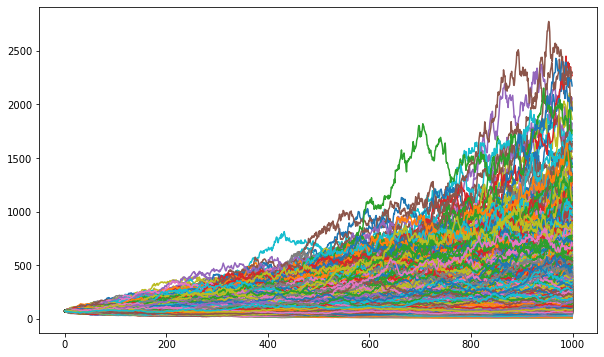

In [59]:
S0 = data['AMZN'].iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0]=S0


for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

plt.figure(figsize=(10,6))
plt.plot(price_list);

### Black-Scholes-Merton

The Black-Scholes-Merton (BSM) model is a mathematical model for pricing an options contract. In particular, the model estimates the variation over time of financial instruments. It assumes these instruments (such as stocks or futures) will have a lognormal distribution of prices. 

In mathematical notation:

\begin{aligned} &C = S_t N(d _1) - K e ^{-rt} N(d _2)\\ &\textbf{where:}\\ &d_1 = \frac{ln\frac{S_t}{K} + (r+ \frac{\sigma ^{2} _v}{2}) \ t}{\sigma_s \ \sqrt{t}}\\ &\text{and}\\ &d_2 = d _1 - \sigma_s \ \sqrt{t}=d_1 - s \cdot \sqrt{t} = \frac{\ln(\frac{S}{K}) + (r - \frac{\sigma^2}{2})t}{s \cdot \sqrt{t}}\\ &\textbf{where:}\\ &C = \text{Call option price}\\ &S = \text{Current stock (or other underlying) price}\\ &K = \text{Strike price}\\ &r = \text{Risk-free interest rate}\\ &t = \text{Time to maturity}\\ &N = \text{A normal distribution}\\ \end{aligned} 




In [60]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
 
def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [61]:
def BSM(S, K, r, stdev, T):
        return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [62]:
S = data['AMZN'].iloc[-1]
S

71.56121759445375

In [63]:
log_returns = np.log(1 + data['AMZN'].pct_change())
stdev = log_returns.std() * 250 ** 0.5
stdev

0.38146654302383076

In [64]:
r = 0.025
K = 110.0
T = 1
print(d1(S, K, r, stdev, T))
print(d2(S, K, r, stdev, T))

-0.8707676639885533
-1.2522342070123842


In [65]:
BSM(S, K, r, stdev, T)

2.444675836444249

**Euler Discretization**

A typical model is to assume that a proportion {\displaystyle \delta }\delta  of the stock price is paid out at pre-determined times $ t_{1},t_{2},\ldots $. The price of the stock is then modelled as:



<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot \sigma^2) \mathbin{\cdot} \delta_t + \sigma \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [66]:
r = 0.025
stdev = log_returns.std() * 250 ** 0.5


In [67]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000

In [68]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data['AMZN'].iloc[-1]  
S[0] = S0

In [69]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])
    
S

array([[ 71.56121759,  71.56121759,  71.56121759, ...,  71.56121759,
         71.56121759,  71.56121759],
       [ 72.00026237,  73.5318789 ,  71.95716997, ...,  74.24193319,
         73.88593352,  71.93875569],
       [ 72.23001345,  72.36248577,  69.50915609, ...,  72.65077202,
         73.83559475,  71.64310615],
       ...,
       [ 31.94879511, 105.45952645,  93.78419323, ...,  73.38232594,
        108.91853996,  64.54910476],
       [ 31.16708492, 103.75434567,  94.52346462, ...,  73.46927099,
        104.97984976,  63.61113073],
       [ 31.67211168, 106.22635248,  96.83529754, ...,  76.46316697,
        100.90870155,  64.68759767]])

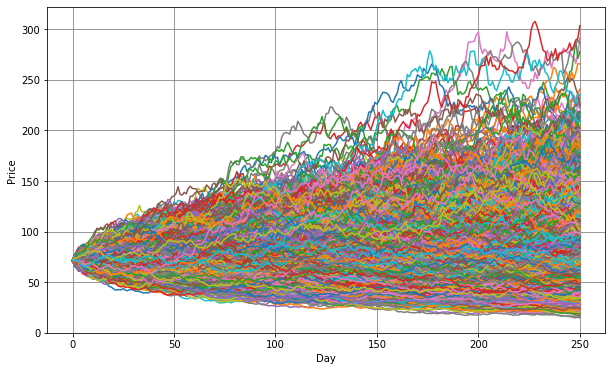

In [70]:
last_price = S[-1]
plt.figure(figsize=(10, 6))
plt.plot(S);

plt.xlabel('Day')
plt.ylabel('Price')
plt.grid(True,color='grey')
#plt.legend()
#plt.axhline(y=last_price, color='r', linestyle='-')
plt.show()